In [271]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

root_path = '/Users/jiahang/Documents/dagma/src/dagma/'

import sys
sys.path.append('/Users/jiahang/Documents/dagma/src/dagma/')

import deconv
from importlib import reload
reload(deconv)

import matplotlib.pyplot as plt
import utils_dagma
import utils
import scipy
import seaborn as sns

# test post_hoc deconv

In [12]:
with open(os.path.join(root_path, 'simulated_data/v11/v60/W/W_2_0.pkl'), 'rb') as f:
    W_2_0 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v60/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
    
W = W_2_0['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_2_0['W_est']
W_dir, model = deconv.net_deconv(W_est, {})

Epoch 0 | Loss 0.033896
Epoch 200 | Loss 0.000581
Epoch 400 | Loss 0.000286
Epoch 600 | Loss 0.000295
Epoch 800 | Loss 0.000156
Epoch 1000 | Loss 0.000135
Epoch 1200 | Loss 0.000108
Epoch 1400 | Loss 0.000104
Epoch 1600 | Loss 0.000100
Epoch 1800 | Loss 0.000096
Epoch 2000 | Loss 0.000093
Epoch 2200 | Loss 0.000089
Epoch 2400 | Loss 0.000085
Epoch 2600 | Loss 0.000082
Epoch 2800 | Loss 0.000078
Epoch 3000 | Loss 0.000075
Epoch 3200 | Loss 0.000072
Epoch 3400 | Loss 0.000068
Epoch 3600 | Loss 0.000065
Epoch 3800 | Loss 0.000065
Epoch 4000 | Loss 0.000062
Epoch 4200 | Loss 0.000061
Epoch 4400 | Loss 0.000072
Epoch 4600 | Loss 0.000057
Epoch 4800 | Loss 0.000053
Epoch 5000 | Loss 0.000052
Epoch 5200 | Loss 0.000050
Epoch 5400 | Loss 0.000049
Epoch 5600 | Loss 0.000048
Epoch 5800 | Loss 0.000048
Epoch 6000 | Loss 0.000046
Epoch 6200 | Loss 0.000049
Epoch 6400 | Loss 0.000042
Epoch 6600 | Loss 0.000042
Epoch 6800 | Loss 0.000041
Epoch 7000 | Loss 0.000051
Epoch 7200 | Loss 0.000047
Epoch 74

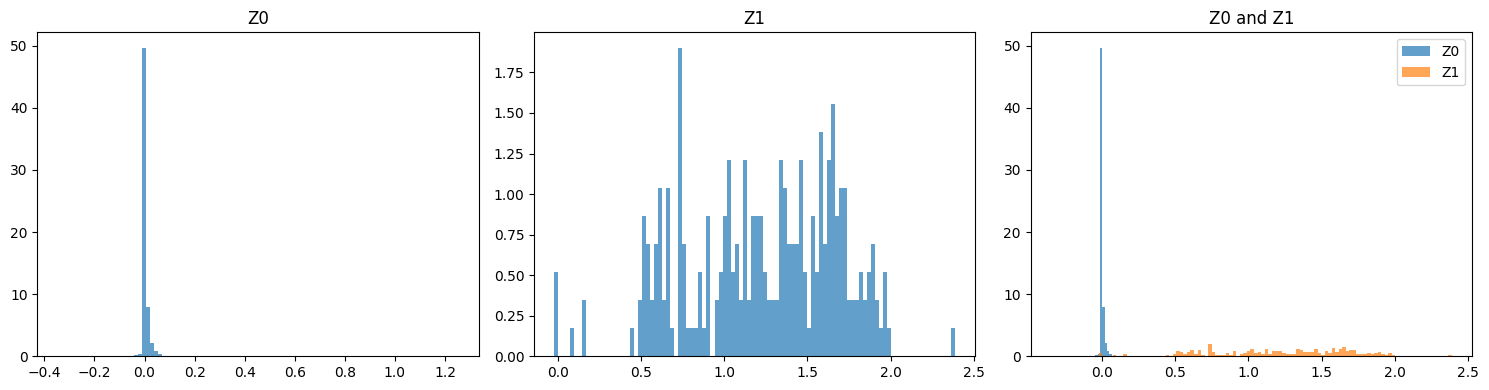

In [26]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

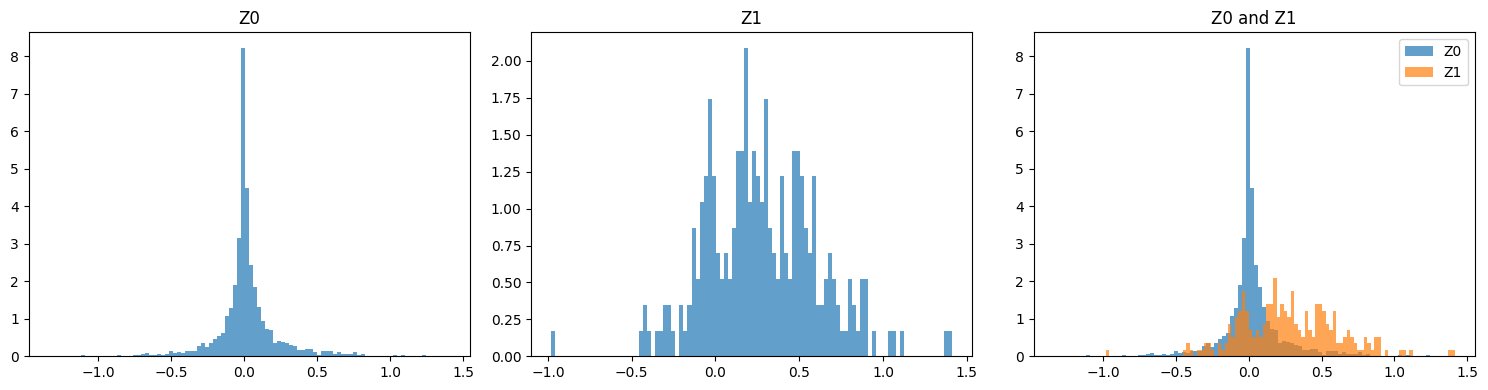

In [27]:
Z = np.abs(W_dir[:n_nodes, :n_nodes]) - np.abs(W_dir[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# data v15

In [299]:
with open(os.path.join(root_path, 'simulated_data/v15/v40/W/W_2_0.pkl'), 'rb') as f:
    W_v15 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v15/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_use_15 = W_v15['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_v15['W_est']
_W_15 = W_use_15[:n_nodes, :n_nodes]
_W_15_knock = W_use_15[n_nodes:, :n_nodes]

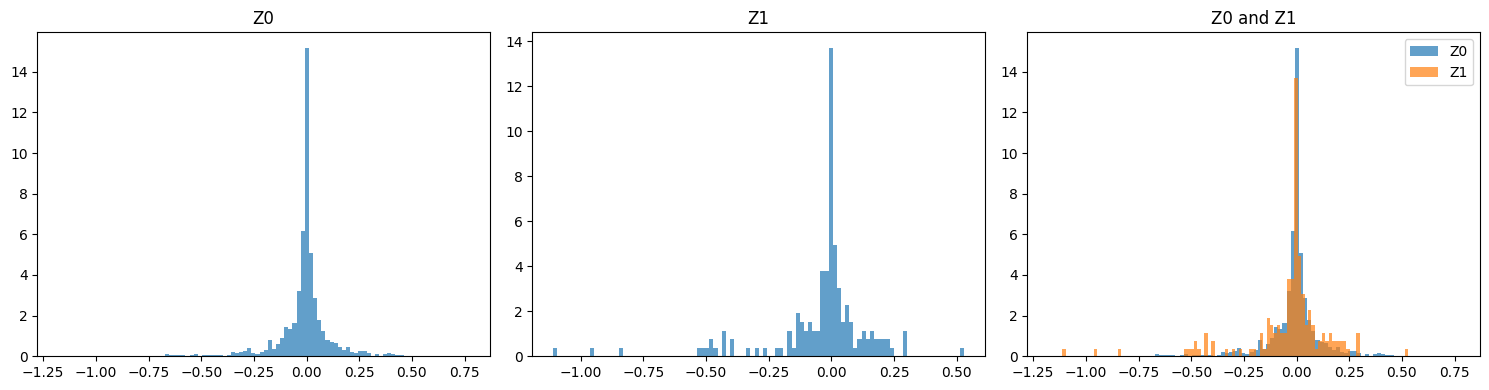

In [194]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [195]:
(Z0 > 0.).sum() / Z0.shape[0]

0.4777777777777778

In [196]:
(Z1 > 0.).sum() / Z1.shape[0]

0.4625

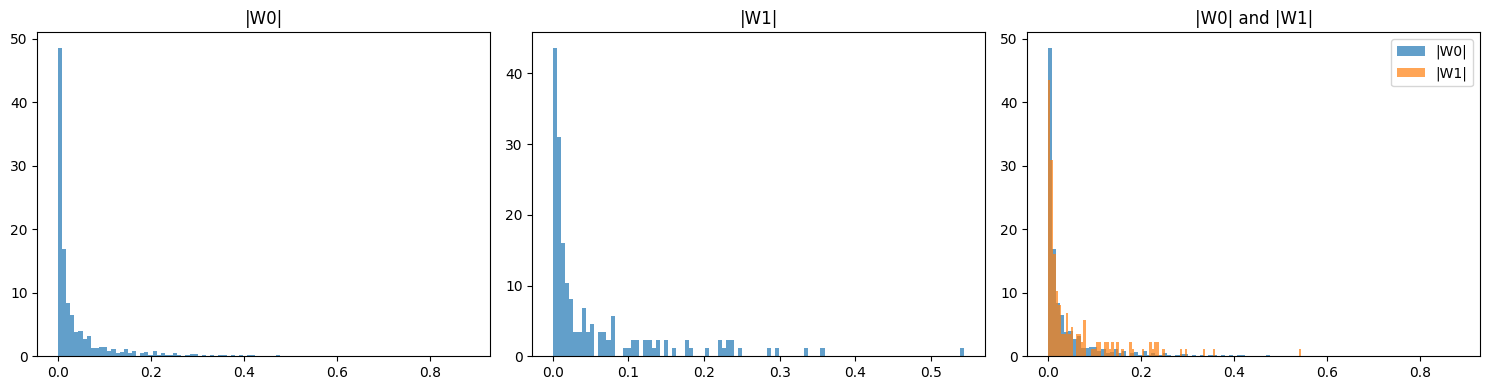

In [150]:
# import matplotlib.pyplot as plt
_W = np.abs(W[:n_nodes, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0|')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1|')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1|')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

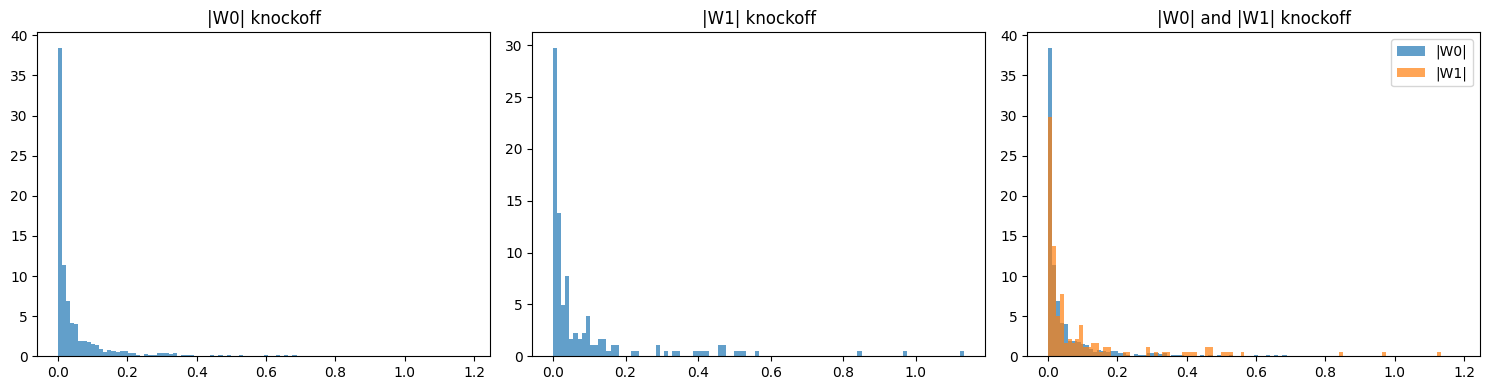

In [151]:
# import matplotlib.pyplot as plt
_W = np.abs(W[n_nodes:, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0| knockoff')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1| knockoff')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1| knockoff')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [152]:
W_est = W_v15['W_est'].copy()
eigvals = np.linalg.eigvals(W_est)
np.linalg.matrix_power(W_est, 5).max()

1.5231612707714128

In [153]:
mask = np.abs(W_est) > 0.3
W_est[mask] = 1.
W_est[~mask] = 0.
utils_dagma.count_accuracy(B_true, W_est)

{'fdr': 0.9925373134328358,
 'tpr': 0.00625,
 'fpr': 0.21451612903225806,
 'shd': 294,
 'nnz': 134}

In [292]:
# import matplotlib.pyplot as plt
_W_11 = W_use_11[:n_nodes, :n_nodes]
_W_11_knock = W_use_11[n_nodes:, :n_nodes]
_W_15 = W_use_15[:n_nodes, :n_nodes]
_W_15_knock = W_use_15[n_nodes:, :n_nodes]

<Axes: >

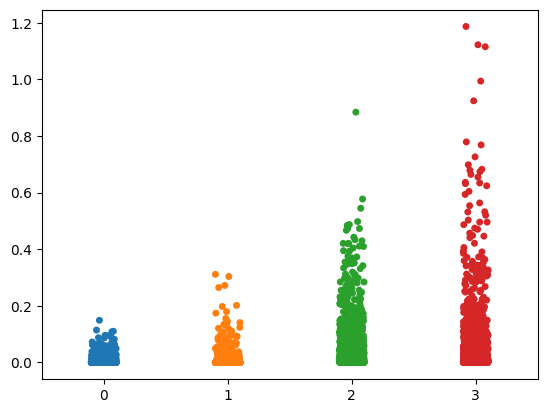

In [295]:
sns.stripplot([np.abs(_W_11[~B_true]), np.abs(_W_11_knock[~B_true]), np.abs(_W_15[~B_true]), np.abs(_W_15_knock[~B_true])])

<Axes: >

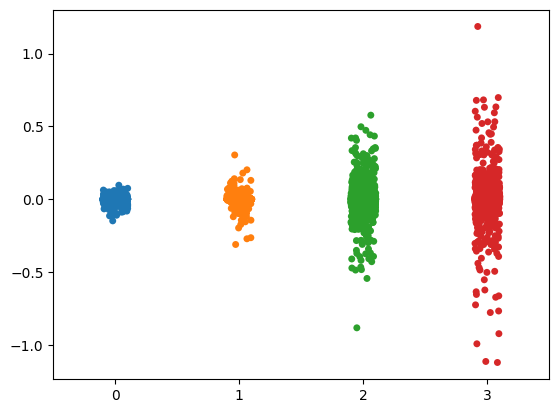

In [296]:
sns.stripplot([_W_11[~B_true], _W_11_knock[~B_true], _W_15[~B_true], _W_15_knock[~B_true]])

# data v16

In [301]:
with open(os.path.join(root_path, 'simulated_data/v16/v40/W/W_2_0.pkl'), 'rb') as f:
    W_v16 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v16/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_use_16 = W_v16['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_v16['W_est']
_W_16 = W_use_16[:n_nodes, :n_nodes]
_W_16_knock = W_use_16[n_nodes:, :n_nodes]

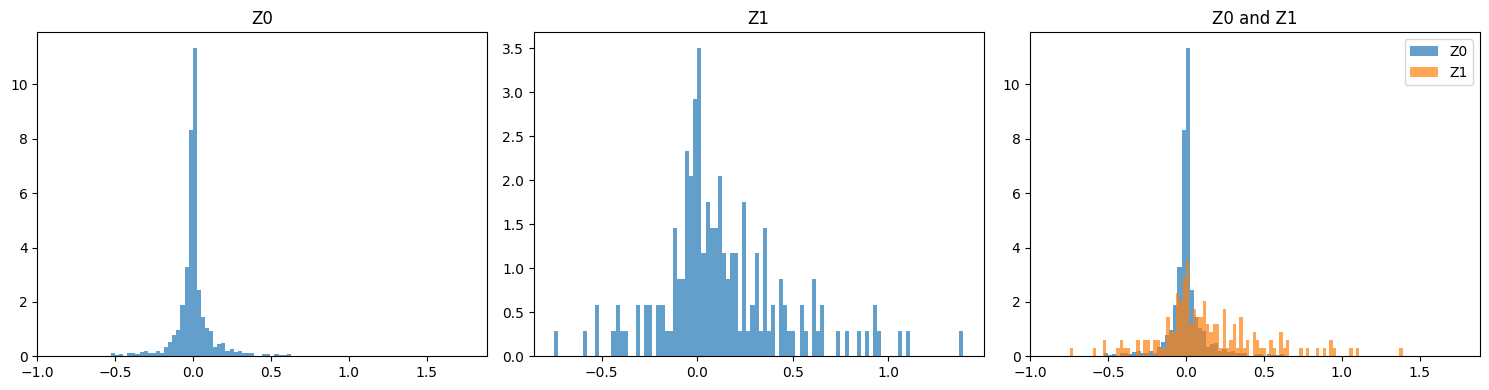

In [202]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [203]:
(Z0 > 0.).sum() / Z0.shape[0]

0.44722222222222224

In [204]:
(Z1 > 0.).sum() / Z1.shape[0]

0.64375

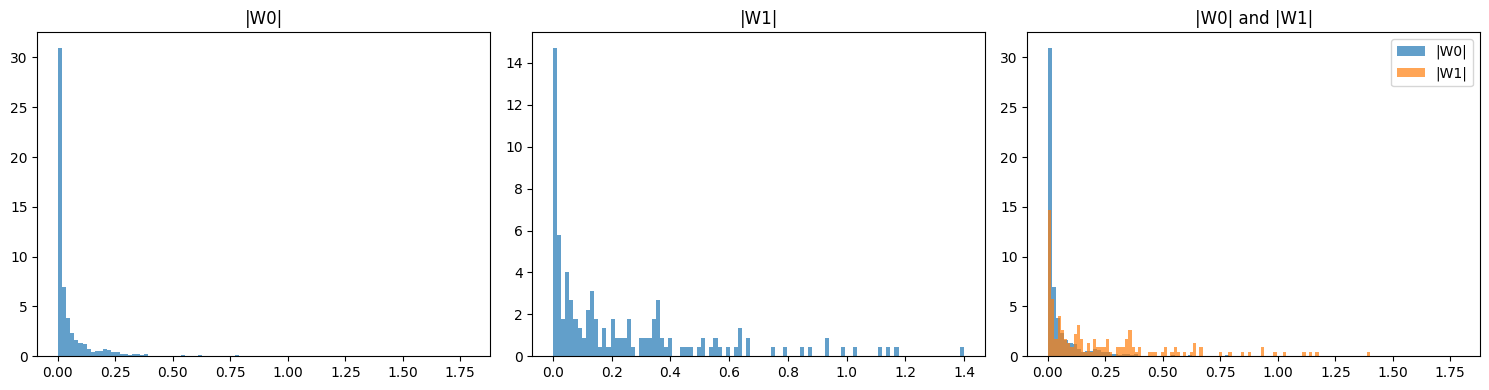

In [164]:
# import matplotlib.pyplot as plt
_W = np.abs(W[:n_nodes, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0|')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1|')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1|')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

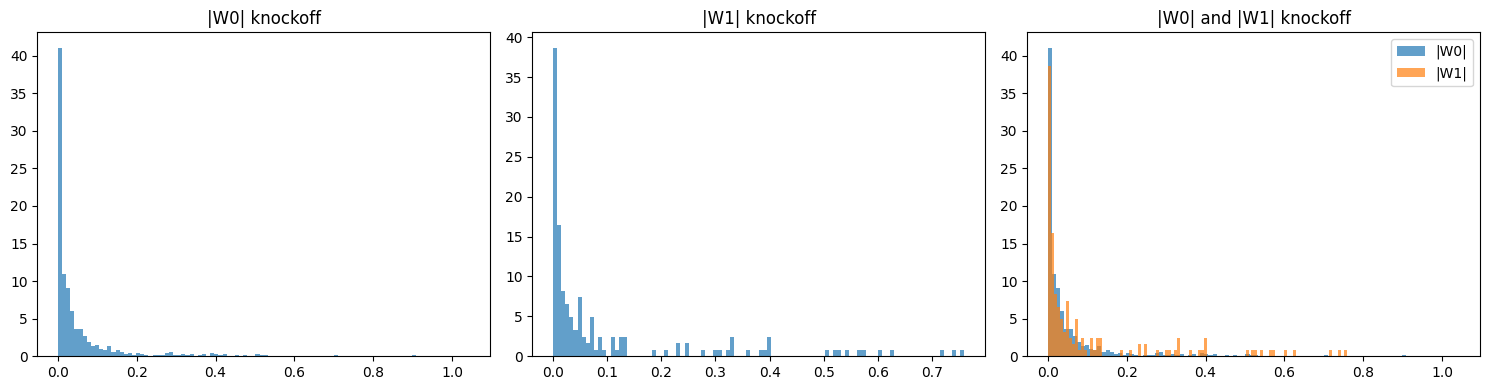

In [165]:
# import matplotlib.pyplot as plt
_W = np.abs(W[n_nodes:, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0| knockoff')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1| knockoff')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1| knockoff')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# data v11 (baseline)

In [197]:
with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W_v11 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W = W_v11['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_v11['W_est']

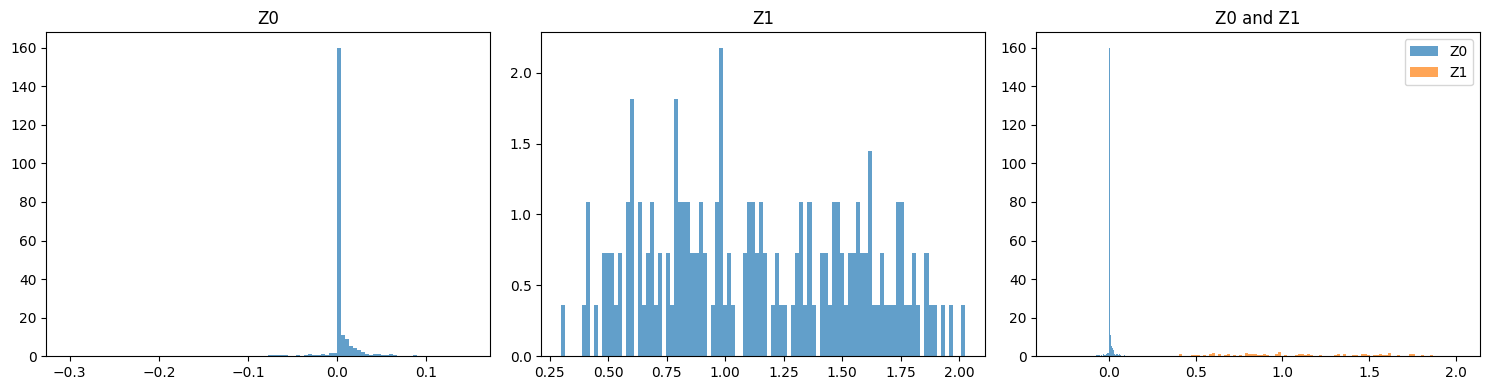

In [198]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [199]:
(Z0 > 0.).sum() / Z0.shape[0]

0.6791666666666667

In [200]:
(Z1 > 0.).sum() / Z1.shape[0]

1.0

<Axes: >

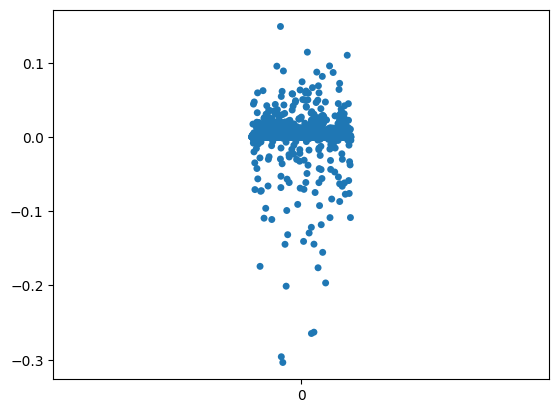

In [157]:
import seaborn as sns
import pandas as pd

sns.stripplot([Z0])

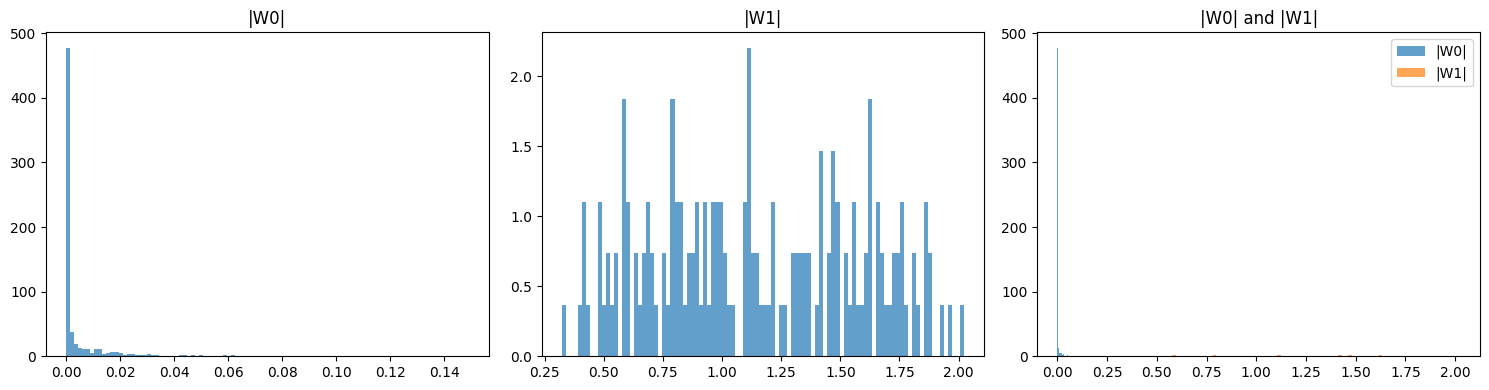

In [158]:
# import matplotlib.pyplot as plt
_W = np.abs(W[:n_nodes, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0|')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1|')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1|')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

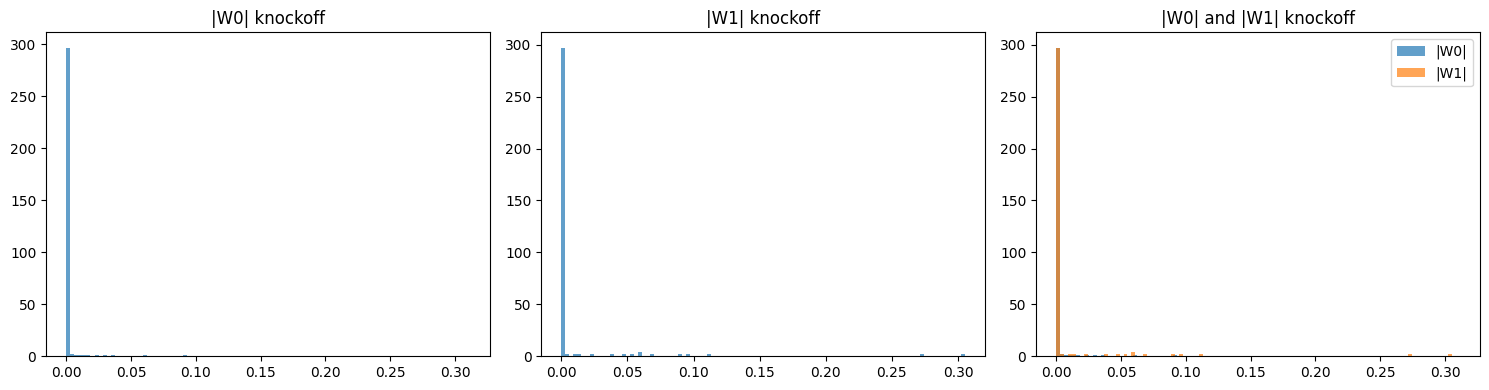

In [159]:
# import matplotlib.pyplot as plt
_W = np.abs(W[n_nodes:, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0| knockoff')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1| knockoff')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1| knockoff')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# data v17

In [209]:
with open(os.path.join(root_path, 'simulated_data/v17/v40/W/W_2_0.pkl'), 'rb') as f:
    W_v17 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v17/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W = W_v17['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_v17['W_est']

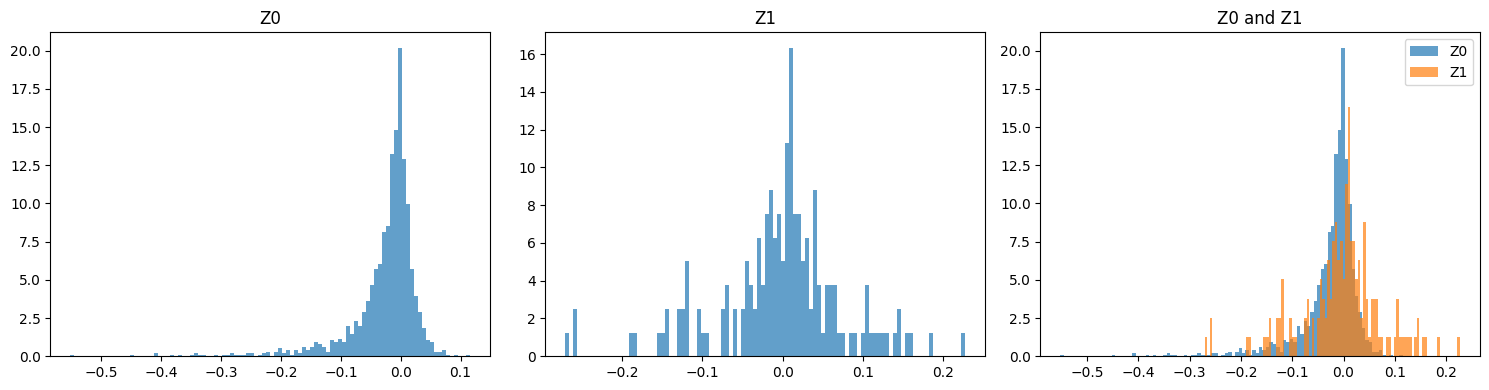

In [210]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [207]:
(Z0 > 0.).sum() / Z0.shape[0]

0.3104166666666667

In [208]:
(Z1 > 0.).sum() / Z1.shape[0]

0.55625

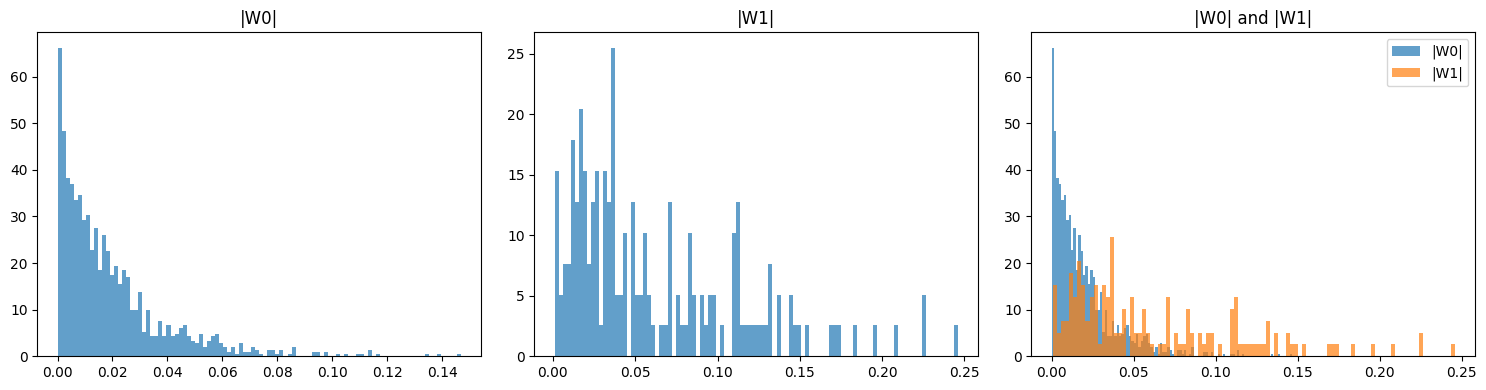

In [187]:
# import matplotlib.pyplot as plt
_W = np.abs(W[:n_nodes, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0|')
axs[1].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1|')
axs[2].hist(np.abs(_W[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1|')
axs[2].hist(np.abs(_W[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [211]:
W_true

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -1.7798781 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.21872749,
        -0.88955955,  0.        ]])

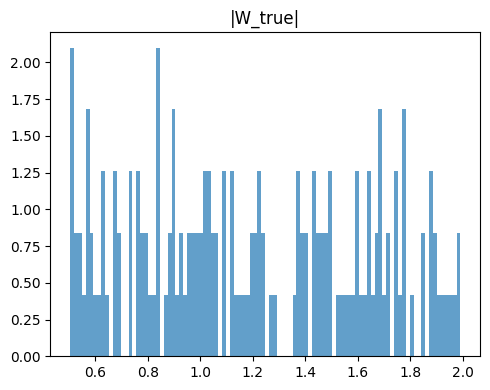

In [214]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.hist(np.abs(W_true[B_true]), bins=100, density=True, alpha=0.7)
axs.set_title('|W_true|')

# Adjust spacing between subplots
plt.tight_layout()
# plt.legend()

# Show the plot
plt.show()

In [215]:
np.abs(W_true[B_true]).min()

0.50294546807378

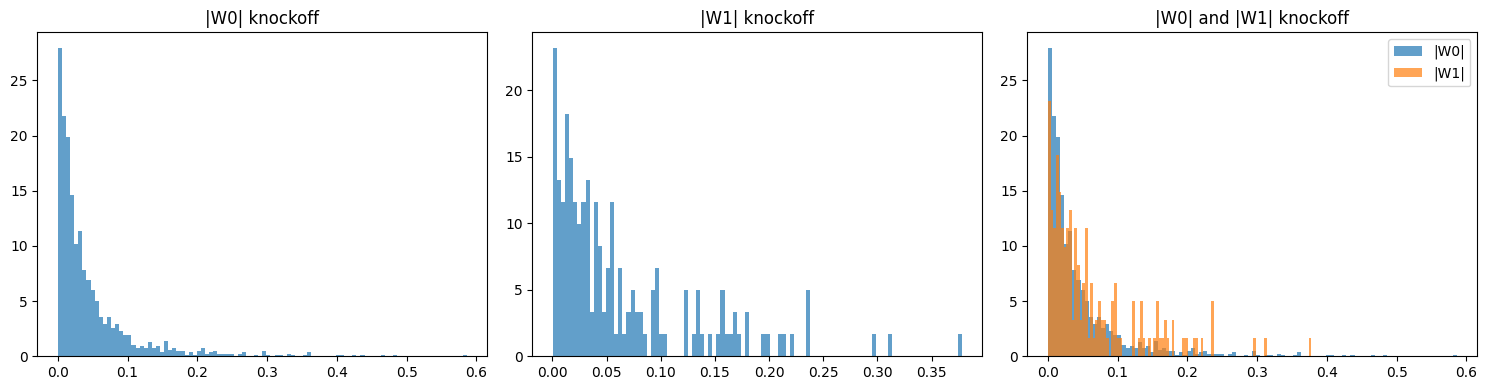

In [186]:
# import matplotlib.pyplot as plt
_W_knock = np.abs(W[n_nodes:, :n_nodes])
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(np.abs(_W_knock[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('|W0| knockoff')
axs[1].hist(np.abs(_W_knock[B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('|W1| knockoff')
axs[2].hist(np.abs(_W_knock[~B_true]), bins=100, density=True, alpha=0.7, label='|W0|')
axs[2].set_title('|W0| and |W1| knockoff')
axs[2].hist(np.abs(_W_knock[B_true]), bins=100, density=True, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [191]:
B_est = W_est[:n_nodes, :n_nodes].copy()
mask = np.abs(B_est) > 0.2
B_est[mask] = 1.
B_est[~mask] = 0.
utils_dagma.count_accuracy(B_true, B_est)

{'fdr': 0.0, 'tpr': 0.025, 'fpr': 0.0, 'shd': 156, 'nnz': 4}

In [188]:
_W[~B_true].max()

0.14685131431235374

In [189]:
_W[B_true].max()

0.24611866048209866

# compare v11 and v17

In [216]:
with open(os.path.join(root_path, 'simulated_data/v17/v40/W/W_2_0.pkl'), 'rb') as f:
    W_17 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v17/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_use_17 = W_17['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est_17 = W_17['W_est']

with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W_11 = pickle.load(f)
W_use_11 = W_11['W_est'][:, :n_nodes]
W_est_11 = W_11['W_est']

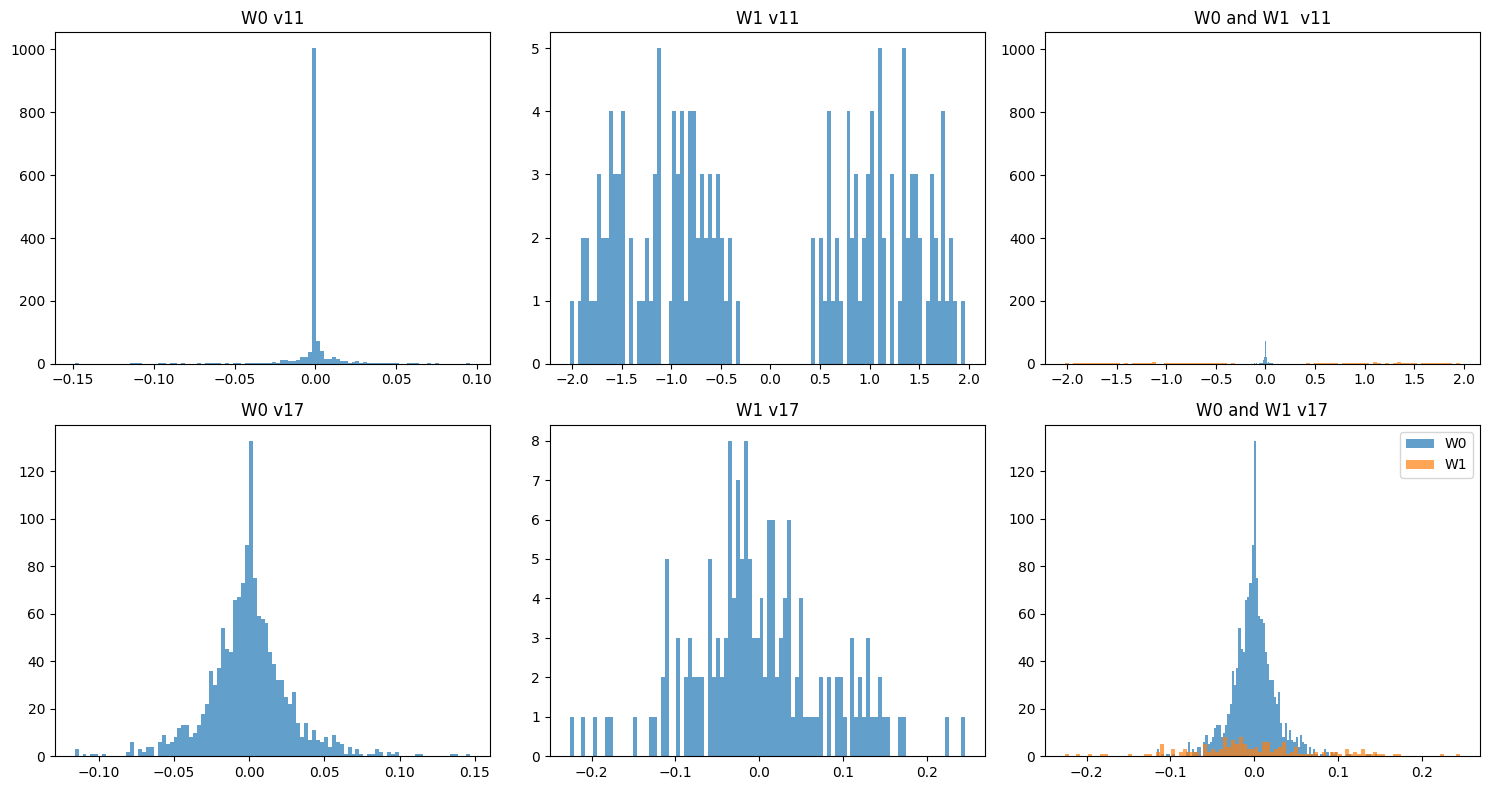

In [234]:
# import matplotlib.pyplot as plt
_W_11 = W_use_11[:n_nodes, :n_nodes]
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0][0].hist(_W_11[~B_true], bins=100, alpha=0.7)
axs[0][0].set_title('W0 v11')
axs[0][1].hist(_W_11[B_true], bins=100, alpha=0.7)
axs[0][1].set_title('W1 v11')
axs[0][2].hist(_W_11[~B_true], bins=100, alpha=0.7, label='W0')
axs[0][2].set_title('W0 and W1  v11')
axs[0][2].hist(_W_11[B_true], bins=100, alpha=0.7, label='W1')

_W_17 = W_use_17[:n_nodes, :n_nodes]
axs[1][0].hist(_W_17[~B_true], bins=100, alpha=0.7)
axs[1][0].set_title('W0 v17')
axs[1][1].hist(_W_17[B_true], bins=100, alpha=0.7)
axs[1][1].set_title('W1 v17')
axs[1][2].hist(_W_17[~B_true], bins=100, alpha=0.7, label='W0')
axs[1][2].set_title('W0 and W1 v17')
axs[1][2].hist(_W_17[B_true], bins=100, alpha=0.7, label='W1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [241]:
_W_11[~B_true].std()

0.014294496728950954

In [242]:
_W_17[~B_true].std()

0.027416170568185

In [248]:
scipy.stats.kurtosis(_W_11[~B_true])

26.88736897454397

In [249]:
scipy.stats.kurtosis(_W_17[~B_true])

3.3216074879962036

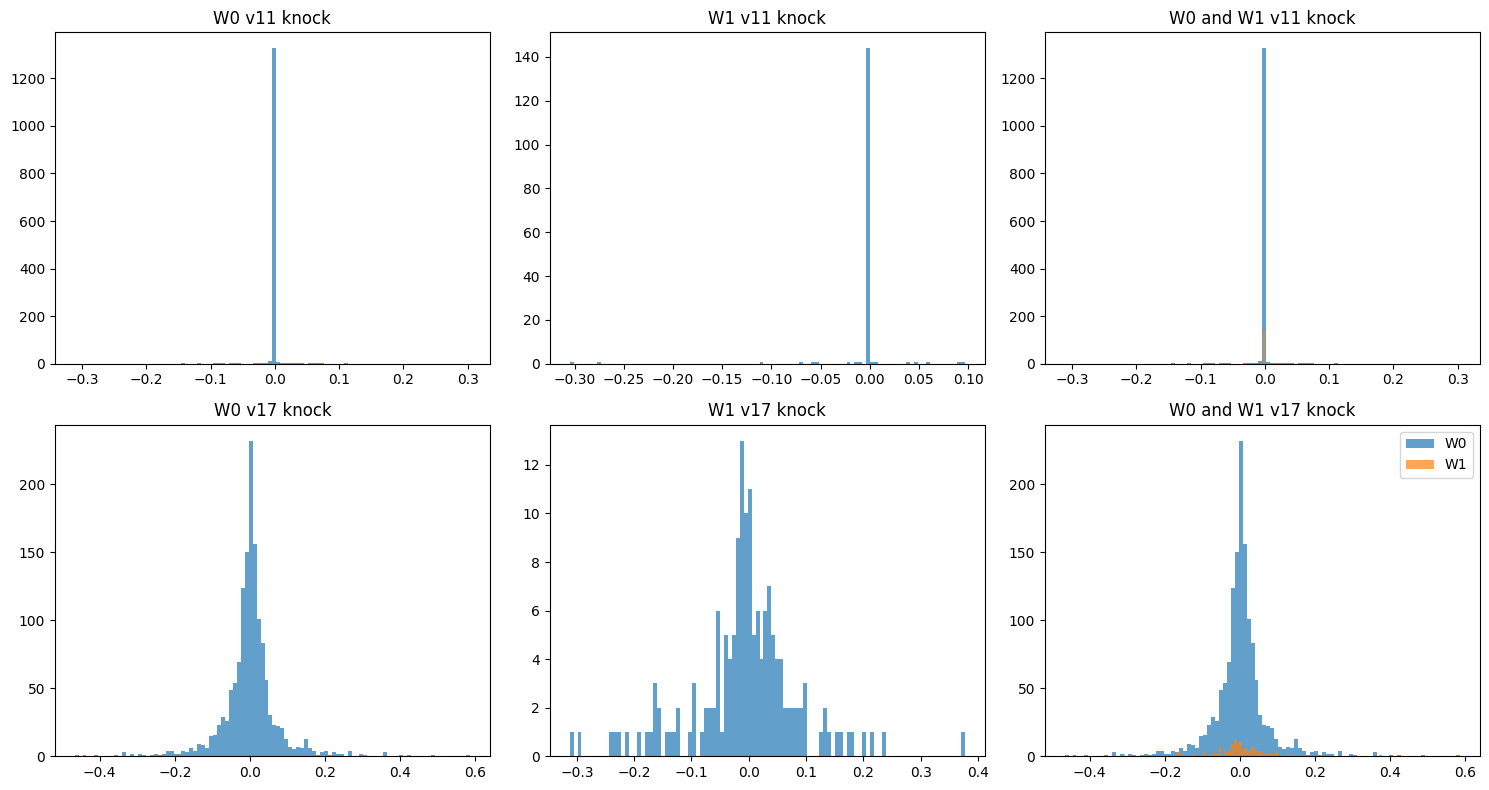

In [252]:
# import matplotlib.pyplot as plt
_W_11_knock = W_use_11[n_nodes:, :n_nodes]
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0][0].hist(_W_11_knock[~B_true], bins=100, alpha=0.7)
axs[0][0].set_title('W0 v11 knock')
axs[0][1].hist(_W_11_knock[B_true], bins=100, alpha=0.7)
axs[0][1].set_title('W1 v11 knock')
axs[0][2].hist(_W_11_knock[~B_true], bins=100, alpha=0.7, label='W0')
axs[0][2].set_title('W0 and W1 v11 knock')
axs[0][2].hist(_W_11_knock[B_true], bins=100, alpha=0.7, label='W1')

_W_17_knock = W_use_17[n_nodes:, :n_nodes]
axs[1][0].hist(_W_17_knock[~B_true], bins=100, alpha=0.7)
axs[1][0].set_title('W0 v17 knock')
axs[1][1].hist(_W_17_knock[B_true], bins=100, alpha=0.7)
axs[1][1].set_title('W1 v17 knock')
axs[1][2].hist(_W_17_knock[~B_true], bins=100, alpha=0.7, label='W0')
axs[1][2].set_title('W0 and W1 v17 knock')
axs[1][2].hist(_W_17_knock[B_true], bins=100, alpha=0.7, label='W1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [244]:
_W_11_knock[~B_true].std()

0.024683788538755105

In [245]:
_W_17_knock[~B_true].std()

0.07724765113315368

In [250]:
scipy.stats.kurtosis(_W_11_knock[~B_true])

68.00384416843494

In [251]:
scipy.stats.kurtosis(_W_17_knock[~B_true])

9.819905803691933

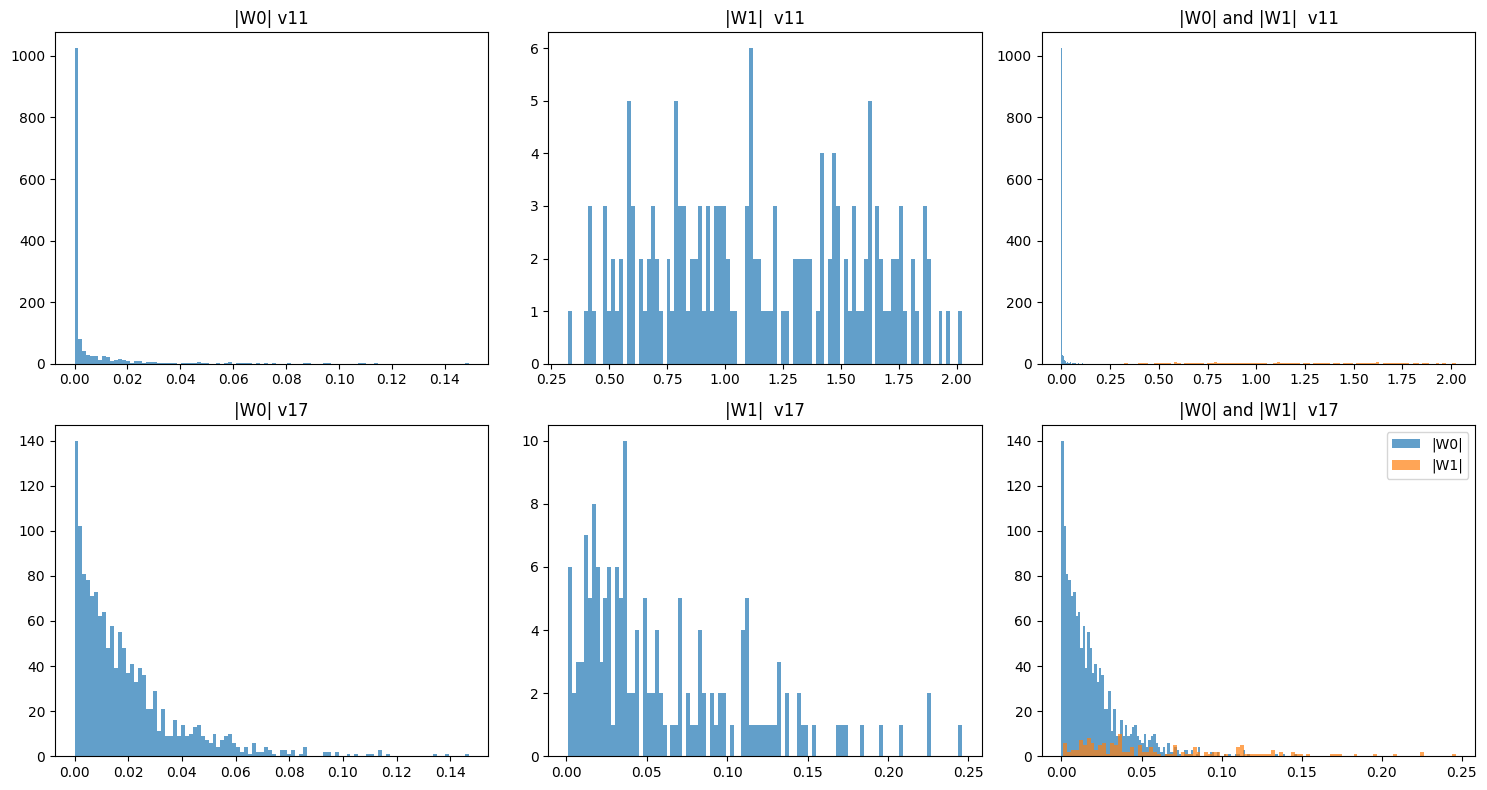

In [228]:
# import matplotlib.pyplot as plt
_W = np.abs(W_use_11[:n_nodes, :n_nodes])
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0][0].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7)
axs[0][0].set_title('|W0| v11')
axs[0][1].hist(np.abs(_W[B_true]), bins=100, [0][1].set_title('|W1|  v11')alpha=0.7)
axs
axs[0][2].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7, label='|W0|')
axs[0][2].set_title('|W0| and |W1|  v11')
axs[0][2].hist(np.abs(_W[B_true]), bins=100, alpha=0.7, label='|W1|')

_W = np.abs(W_use_17[:n_nodes, :n_nodes])
axs[1][0].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7)
axs[1][0].set_title('|W0| v17')
axs[1][1].hist(np.abs(_W[B_true]), bins=100, alpha=0.7)
axs[1][1].set_title('|W1|  v17')
axs[1][2].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7, label='|W0|')
axs[1][2].set_title('|W0| and |W1|  v17')
axs[1][2].hist(np.abs(_W[B_true]), bins=100, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

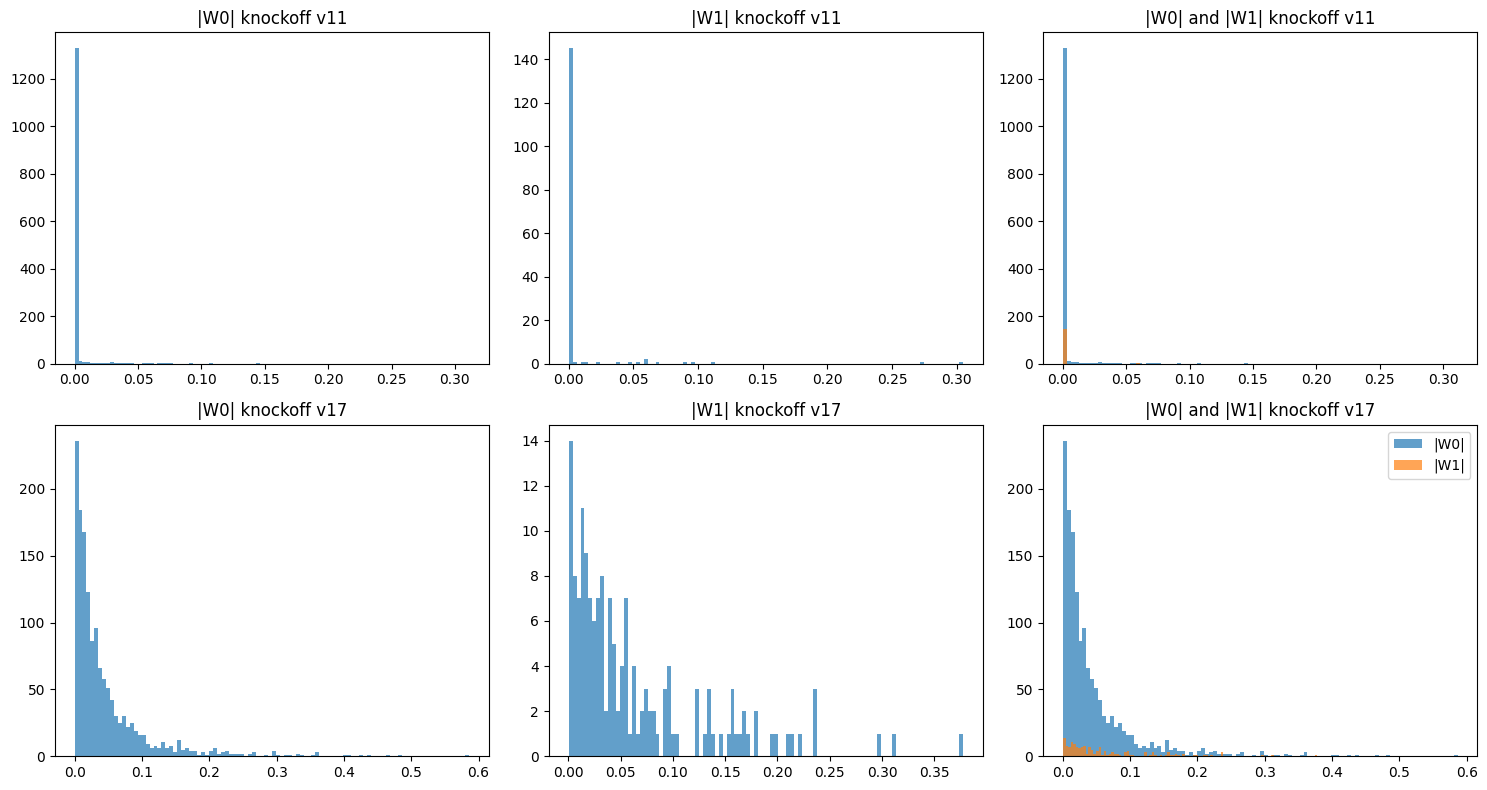

In [229]:
# import matplotlib.pyplot as plt
_W = np.abs(W_use_11[n_nodes:, :n_nodes])
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0][0].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7)
axs[0][0].set_title('|W0| knockoff v11')
axs[0][1].hist(np.abs(_W[B_true]), bins=100, alpha=0.7)
axs[0][1].set_title('|W1| knockoff v11')
axs[0][2].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7, label='|W0|')
axs[0][2].set_title('|W0| and |W1| knockoff v11')
axs[0][2].hist(np.abs(_W[B_true]), bins=100, alpha=0.7, label='|W1|')

_W = np.abs(W_use_17[n_nodes:, :n_nodes])
axs[1][0].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7)
axs[1][0].set_title('|W0| knockoff v17')
axs[1][1].hist(np.abs(_W[B_true]), bins=100, alpha=0.7)
axs[1][1].set_title('|W1| knockoff v17')
axs[1][2].hist(np.abs(_W[~B_true]), bins=100, alpha=0.7, label='|W0|')
axs[1][2].set_title('|W0| and |W1| knockoff v17')
axs[1][2].hist(np.abs(_W[B_true]), bins=100, alpha=0.7, label='|W1|')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [287]:
# import matplotlib.pyplot as plt
_W_11 = W_use_11[:n_nodes, :n_nodes]
_W_11_knock = W_use_11[n_nodes:, :n_nodes]
_W_17 = W_use_17[:n_nodes, :n_nodes]
_W_17_knock = W_use_17[n_nodes:, :n_nodes]

In [309]:
np.linalg.eigvals(W_use_11)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
W_ues_11_norm
_W_11 = W_use_11[:n_nodes, :n_nodes]
_W_11_knock = W_use_11[n_nodes:, :n_nodes]
_W_17 = W_use_17[:n_nodes, :n_nodes]
_W_17_knock = W_use_17[n_nodes:, :n_nodes]

<Axes: >

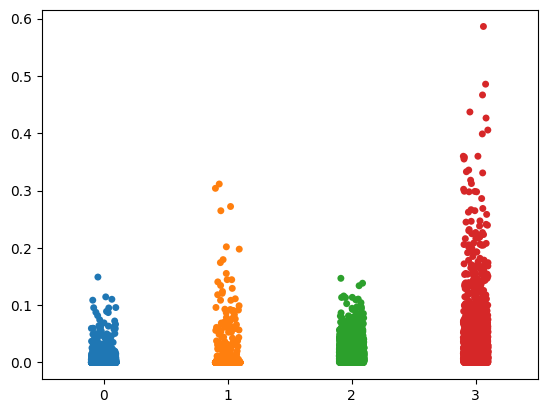

In [289]:
sns.stripplot([np.abs(_W_11[~B_true]), np.abs(_W_11_knock[~B_true]), np.abs(_W_17[~B_true]), np.abs(_W_17_knock[~B_true])])

<Axes: >

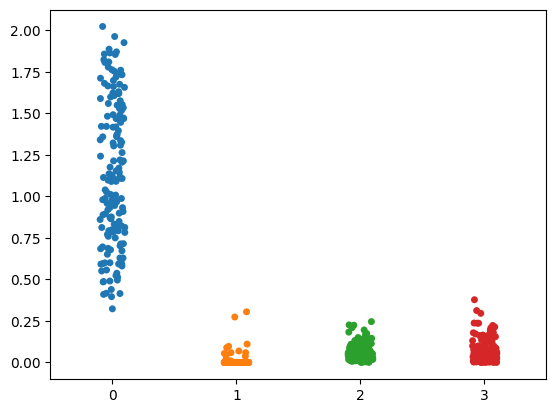

In [306]:
sns.stripplot([np.abs(_W_11[B_true]), np.abs(_W_11_knock[B_true]), np.abs(_W_17[B_true]), np.abs(_W_17_knock[B_true])])

<Axes: >

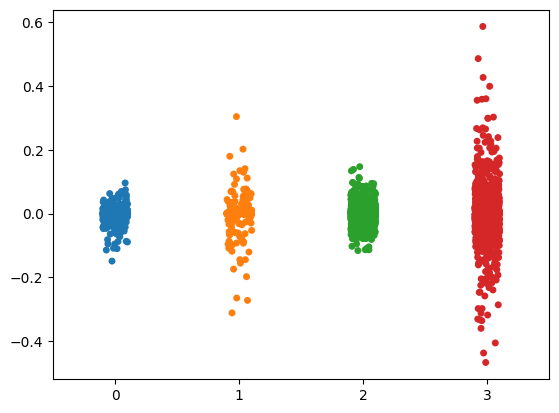

In [288]:
sns.stripplot([_W_11[~B_true], _W_11_knock[~B_true], _W_17[~B_true], _W_17_knock[~B_true]])

<Axes: >

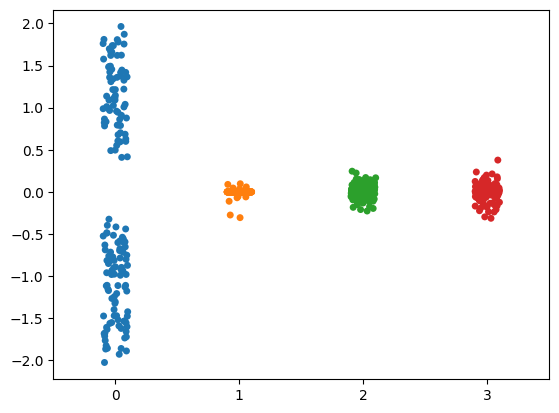

In [305]:
sns.stripplot([_W_11[B_true], _W_11_knock[B_true], _W_17[B_true], _W_17_knock[B_true]])

<Axes: >

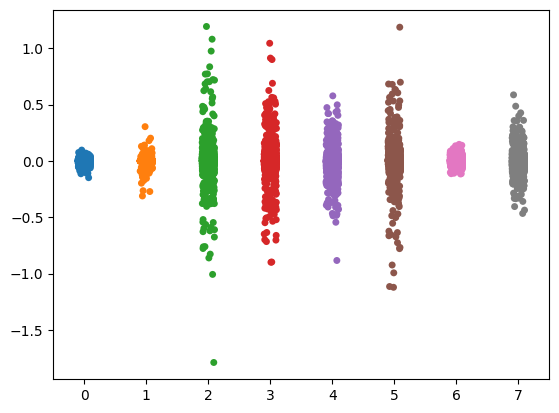

In [303]:
sns.stripplot([_W_11[~B_true], _W_11_knock[~B_true], _W_16[~B_true], _W_16_knock[~B_true], _W_15[~B_true], _W_15_knock[~B_true],  _W_17[~B_true], _W_17_knock[~B_true]])

<Axes: >

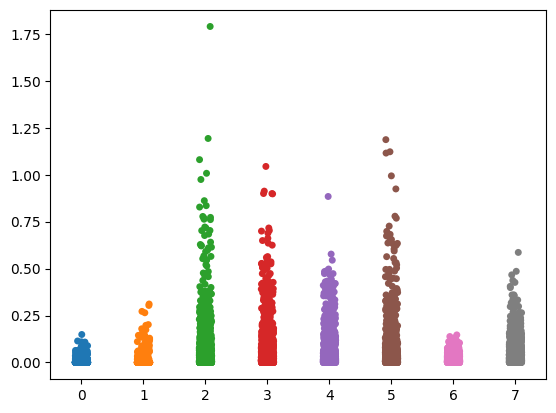

In [304]:
data_list = [_W_11[~B_true], _W_11_knock[~B_true], _W_16[~B_true], _W_16_knock[~B_true], _W_15[~B_true], _W_15_knock[~B_true],  _W_17[~B_true], _W_17_knock[~B_true]]
sns.stripplot([np.abs(data) for data in data_list])

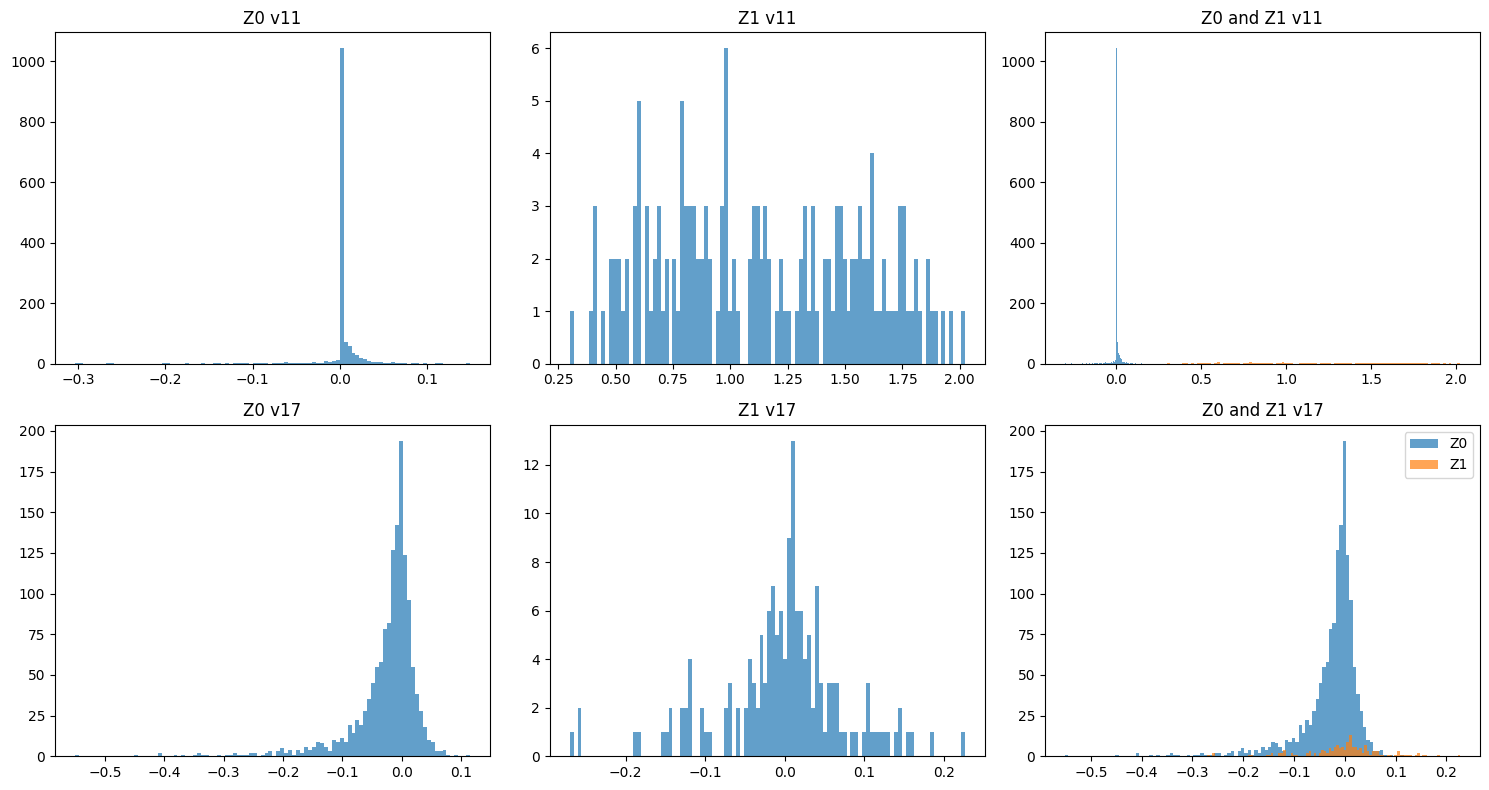

In [230]:
Z_11 = np.abs(W_use_11[:n_nodes, :n_nodes]) - np.abs(W_use_11[n_nodes:, :n_nodes])
Z0_11, Z1_11 = Z_11[~B_true], Z_11[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0][0].hist(Z0_11, bins=100, alpha=0.7)
axs[0][0].set_title('Z0 v11')
axs[0][1].hist(Z1_11, bins=100, alpha=0.7)
axs[0][1].set_title('Z1 v11')
axs[0][2].hist(Z0_11, bins=100, alpha=0.7, label='Z0')
axs[0][2].set_title('Z0 and Z1 v11')
axs[0][2].hist(Z1_11, bins=100, alpha=0.7, label='Z1')

Z_17 = np.abs(W_use_17[:n_nodes, :n_nodes]) - np.abs(W_use_17[n_nodes:, :n_nodes])
Z0_17, Z1_17 = Z_17[~B_true], Z_17[B_true]
# import matplotlib.pyplot as plt
axs[1][0].hist(Z0_17, bins=100, alpha=0.7)
axs[1][0].set_title('Z0 v17')
axs[1][1].hist(Z1_17, bins=100, alpha=0.7)
axs[1][1].set_title('Z1 v17')
axs[1][2].hist(Z0_17, bins=100, alpha=0.7, label='Z0')
axs[1][2].set_title('Z0 and Z1 v17')
axs[1][2].hist(Z1_17, bins=100, alpha=0.7, label='Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

<Axes: >

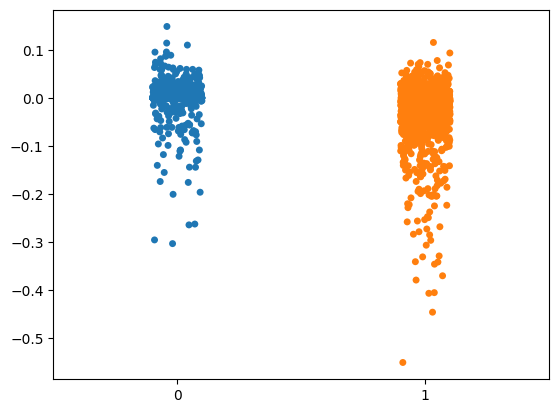

In [282]:
sns.stripplot([Z0_11, Z0_17])

In [224]:
(Z0_11 > 0.).sum() / Z0_11.shape[0] * 100

67.91666666666667

In [225]:
(Z0_17 > 0.).sum() / Z0_17.shape[0] * 100

31.041666666666668